<a href="https://colab.research.google.com/github/rishabhoops/Machine-Learning-Repository/blob/main/SVM_Classification_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [2]:
dataset =pd.read_csv("/content/Instagram Ads SVM.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [3]:
print(x)

[[   15  6334]
 [   28  6667]
 [   20 14334]
 [   21 19000]
 [   15 25334]
 [   21 19334]
 [   21 28000]
 [   25 50000]
 [   20 11000]
 [   28 21667]
 [   20 26667]
 [   26 17000]
 [   28 36000]
 [   18  6667]
 [   20 26334]
 [   21 18000]
 [   24 45000]
 [   24 29667]
 [   19 10667]
 [   14 14667]
 [   23 27667]
 [   28  7667]
 [   21 19334]
 [   19 18334]
 [   18 16000]
 [   22 26334]
 [   17  6000]
 [   25 39000]
 [   21  6667]
 [   20 29000]
 [   18 22000]
 [   25 40000]
 [   17 21000]
 [   24 22667]
 [   20 26667]
 [   19  9000]
 [   16  7667]
 [   26 37667]
 [   25  6000]
 [   27 37334]
 [   24 38667]
 [   20  5000]
 [   23  9334]
 [   23 27667]
 [   26 49667]
 [   15  7000]
 [   16 24000]
 [   20 11667]
 [   21 29667]
 [   20 28667]
 [   30 26667]
 [   31 23667]
 [   29 23667]
 [   20 30000]
 [   29 11000]
 [   17 18334]
 [   28 23667]
 [   23 49334]
 [   23 15667]
 [   16 29334]
 [   27 38334]
 [   20 39334]
 [   27 14334]
 [   27 24000]
 [   18  9334]
 [   28 15667]
 [   20  7

In [33]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1
 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 0 1 0 0 1 1 1 0]


## Splitting the dataset into Training & Test set

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)

## Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [36]:
print(x_train)

[[ 0.13445177  1.60168298]
 [-0.4532462   2.01761313]
 [ 0.72214974  0.15981952]
 [ 0.25199136 -0.67204079]
 [-0.10062742 -0.39478175]
 [-0.21816702 -0.45026683]
 [-0.5707858   2.04531408]
 [ 2.13262486  0.88070965]
 [ 1.3098477  -1.53168523]
 [ 1.07476852  1.79575599]
 [ 0.83968933  1.87894202]
 [ 0.95722892 -1.28212714]
 [ 1.66246649 -1.03256904]
 [ 1.3098477   1.04708172]
 [-0.21816702 -0.4224827 ]
 [ 0.36953095  0.07663348]
 [-1.74618174 -1.58708712]
 [ 0.25199136  0.07663348]
 [-1.15848377  0.10433443]
 [-0.10062742 -0.67204079]
 [-0.21816702 -0.61663889]
 [-1.62864214  0.15981952]
 [ 0.25199136  0.04884935]
 [-1.15848377  0.10433443]
 [ 0.25199136 -0.45026683]
 [ 0.25199136 -0.4224827 ]
 [ 0.83968933  0.85300871]
 [ 1.78000608 -0.45026683]
 [ 0.95722892  1.18575283]
 [-1.15848377 -1.69805729]
 [ 0.72214974 -1.22664205]
 [ 0.48707055  1.57398203]
 [-1.62864214 -0.11752271]
 [-0.5707858  -1.61487126]
 [ 0.83968933 -0.92159888]
 [-1.04094417 -0.53345286]
 [-1.15848377  0.29840744]
 

In [37]:
print(x_test)

[[ 2.13262486 -0.94938301]
 [-0.21816702 -0.31159572]
 [-0.68832539  0.35389252]
 [-0.80586499  0.18752046]
 [-1.74618174 -1.53168523]
 [-1.04094417  0.21522141]
 [-0.10062742 -0.14522366]
 [ 0.95722892  0.54796553]
 [-0.10062742  1.9344271 ]
 [ 1.4273873   0.15981952]
 [-0.21816702 -1.47620015]
 [-0.80586499 -1.33752903]
 [-0.10062742 -0.64433984]
 [ 0.13445177  0.82530776]
 [ 1.66246649  1.490796  ]
 [ 2.01508527  0.32619158]
 [ 0.25199136 -0.67204079]
 [ 1.3098477   2.04531408]
 [-0.21816702  0.40937761]
 [-1.39356296 -1.55938618]
 [ 0.25199136 -0.11752271]
 [-0.92340458  0.35389252]
 [-0.68832539  1.1025668 ]
 [ 0.83968933 -0.72752587]
 [ 0.36953095 -0.31159572]
 [ 0.25199136 -0.31159572]
 [ 0.13445177  1.60168298]
 [ 0.36953095  2.01761313]
 [-1.15848377 -0.92159888]
 [ 0.25199136 -0.11752271]
 [-1.86372133 -0.89389793]
 [ 2.01508527 -0.00655255]
 [ 1.78000608 -0.06203763]
 [-1.04094417 -0.50566873]
 [-0.10062742  1.87894202]
 [-0.33570661  1.07486585]
 [-0.21816702 -0.11752271]
 

## SVM Training on Training set

In [38]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=21)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=21)

## Predicting

In [39]:
print(classifier.predict(sc.transform([[32,45000]])))

[1]


## Predicting Test set results

In [40]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


## Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[37  0]
 [ 4 19]]


0.9333333333333333

## Visualizing Test Set results

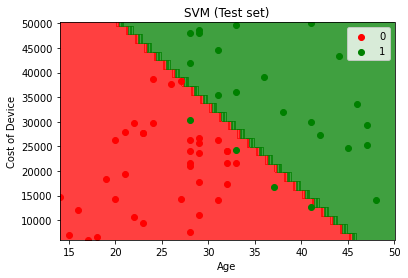

In [42]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_test), y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() + 3, step = 1),
                     np.arange(start = x_set[:, 1].min() - 0, stop = x_set[:, 1].max() + 200, step = 1))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Cost of Device')
plt.legend()
plt.show()

## Visualising Training set results

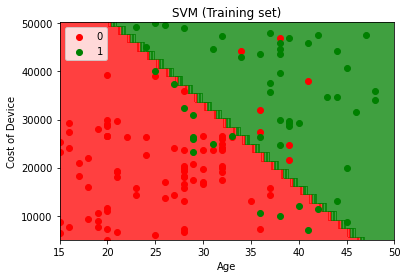

In [43]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() + 3, step = 1),
                     np.arange(start = x_set[:, 1].min() - 0, stop = x_set[:, 1].max() + 200, step = 1))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Cost of Device')
plt.legend()
plt.show()